In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

This notebook contains Python and R code for reproducing the results in our paper on factors influencing student ratings of automatically generated questions:

Johnson, B. G., Dittel, J. S., & Van Campenhout, R. (2025). Intrinsic and contextual factors impacting student ratings of automatically
generated questions: A large-scale data analysis. _Journal of Educational Data Mining_, _17_(1), 217–241. https://doi.org/10.5281/zenodo.15174917

This paper is an expanded version of our paper that won the [Best Paper Award](https://educationaldatamining.org/edm2024/best-paper-awards/) at [Educational Data Mining 2024](https://educationaldatamining.org/edm2024/):

Johnson, B. G., Dittel, J. S., & Van Campenhout, R. (2024). Investigating student ratings with features of automatically generated
questions: A large-scale analysis using data from natural learning contexts. In B. Paaßen & C. D. Epp (Eds.), _Proceedings of the 17th
International Conference on Educational Data Mining_ (pp. 194–202). International Educational Data Mining Society.
https://doi.org/10.5281/zenodo.12729796

## Read sessions data set

In [3]:
sessions = pd.read_parquet( 'sessions.parquet' )
sessions.head()

,student_id,question_id,thumbs_up,thumbs_down,H1_first_correct,H2_cumulative_answered,H3_spelling_suggestion,H4_sentence_textrank_rank,H5_answer_tf_idf_rank,H6_answer_pos,H7_answer_log_probability,H8_answer_location,H9_feedback,H10_reviewed,subject
0,26EFUDCGXGK2R2BMUA65,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0,Political Science
1,AK53WK5B75TBJXS7MMSM,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0,Political Science
2,VGEWC8NNTPF6ZNP2XGDM,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0,Political Science
3,35QFXU45PTMQP8PXPZH8,0000078ca057d9d241313d8e375c22d2f051f9cb344aa8...,0,0,0,1,0,0.401515,0.102564,NOUN,-10.910631,3,outcome,0,Medical
4,A7868K7YXB2BJKUEV8BS,0000078ca057d9d241313d8e375c22d2f051f9cb344aa8...,0,0,1,1,0,0.401515,0.102564,NOUN,-10.910631,3,outcome,0,Medical


## Exploratory data analysis

Total number of sessions, questions, and students.

In [4]:
len( sessions ), sessions.question_id.nunique(), sessions.student_id.nunique()

(5214211, 809848, 432930)

Total number of ratings and ratings per 1,000 sessions.

In [5]:
sessions[ 'thumbs_up thumbs_down'.split() ].sum()

thumbs_up      17285
thumbs_down    10434
dtype: int64

In [6]:
( sessions[ 'thumbs_up thumbs_down'.split() ].mean() * 1000 ).round( 2 )

thumbs_up      3.31
thumbs_down    2.00
dtype: float64

### Table 3: Ratings per 1,000 sessions for categorical variable levels.

In [7]:
def ratings_per_1000_sessions( sessions, variable ):
    return sessions.groupby( variable ).agg(
        sessions=( 'thumbs_up', 'count' ),
        thumbs_up=( 'thumbs_up', lambda g: g.mean() * 1000 ),
        thumbs_down=( 'thumbs_down', lambda g: g.mean() * 1000 )
    ).round( 2 )

In [8]:
ratings_per_1000_sessions( sessions, 'H1_first_correct' )

,sessions,thumbs_up,thumbs_down
H1_first_correct,,,
0,2292927,2.91,3.04
1,2921284,3.63,1.19


In [9]:
ratings_per_1000_sessions( sessions, 'H3_spelling_suggestion' )

,sessions,thumbs_up,thumbs_down
H3_spelling_suggestion,,,
0,4926209,3.30,2.05
1,288002,3.59,1.12


In [10]:
ratings_per_1000_sessions( sessions, 'H6_answer_pos' )

,sessions,thumbs_up,thumbs_down
H6_answer_pos,,,
ADJ,1509164,3.38,1.76
ADV,52541,2.70,5.23
NOUN,3207347,3.35,1.96
PROPN,247666,3.01,2.23
VERB,197493,2.86,3.43


In [11]:
ratings_per_1000_sessions( sessions, 'H9_feedback' )

,sessions,thumbs_up,thumbs_down
H9_feedback,,,
common_answer,3299873,3.28,1.68
context,477814,3.45,2.55
outcome,1436524,3.35,2.55


In [12]:
ratings_per_1000_sessions( sessions, 'H10_reviewed' )

,sessions,thumbs_up,thumbs_down
H10_reviewed,,,
0,4915386,3.34,2.03
1,298825,2.86,1.54


### Figure 4: Ratings per 1,000 sessions for continuous variables.

In [13]:
def ratings_per_1000_sessions_continuous( sessions, variable ):
    sessions.groupby( pd.qcut( sessions[ variable ], 10 ), observed=False ).agg(
        thumbs_up=( 'thumbs_up', lambda g: g.mean() * 1000 ),
        thumbs_down=( 'thumbs_down', lambda g: g.mean() * 1000 ),
    ).plot( figsize=( 9, 6 ), color='g r'.split() )
    plt.ylabel( 'Ratings per 1,000 Sessions' )

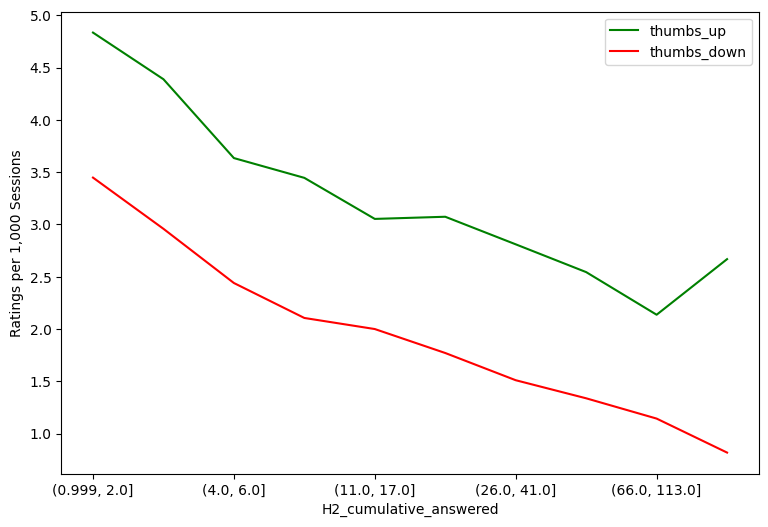

In [14]:
ratings_per_1000_sessions_continuous( sessions, 'H2_cumulative_answered' )

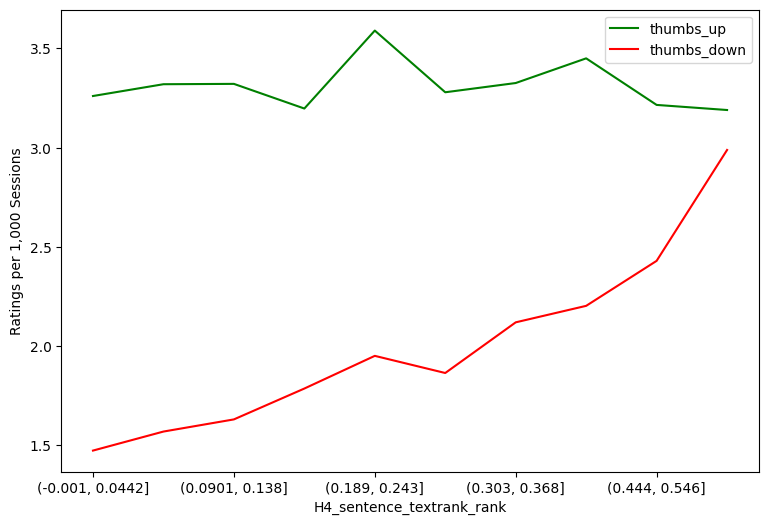

In [15]:
ratings_per_1000_sessions_continuous( sessions, 'H4_sentence_textrank_rank' )

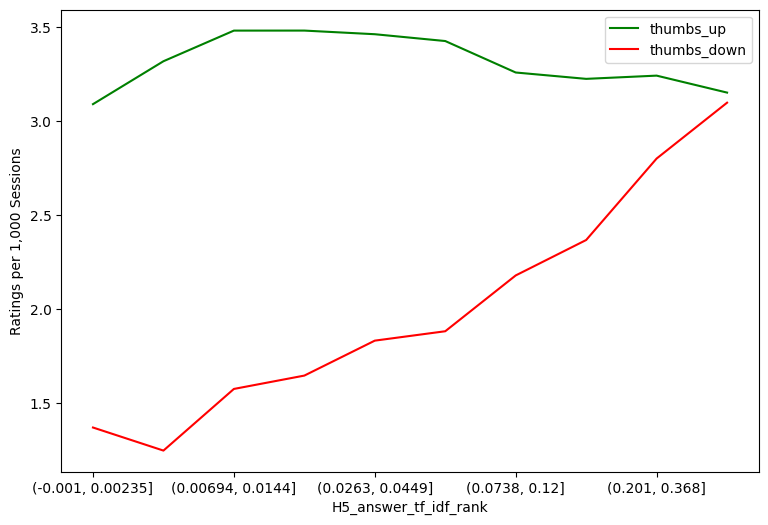

In [16]:
ratings_per_1000_sessions_continuous( sessions, 'H5_answer_tf_idf_rank' )

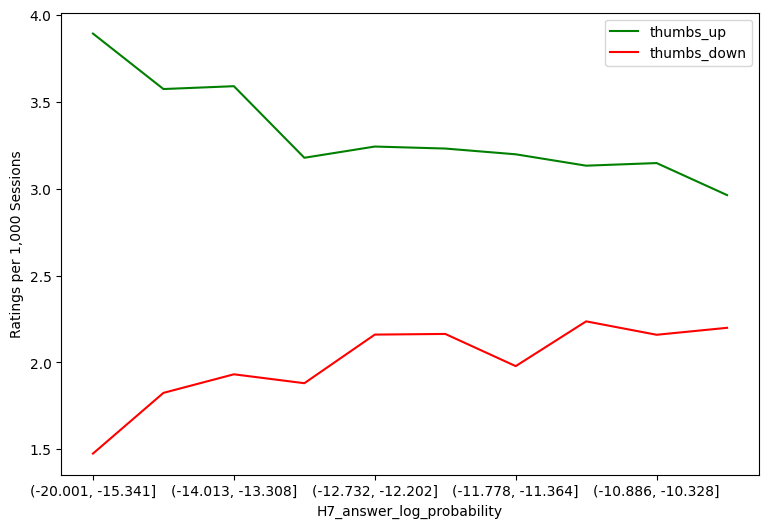

In [17]:
ratings_per_1000_sessions_continuous( sessions, 'H7_answer_log_probability' )

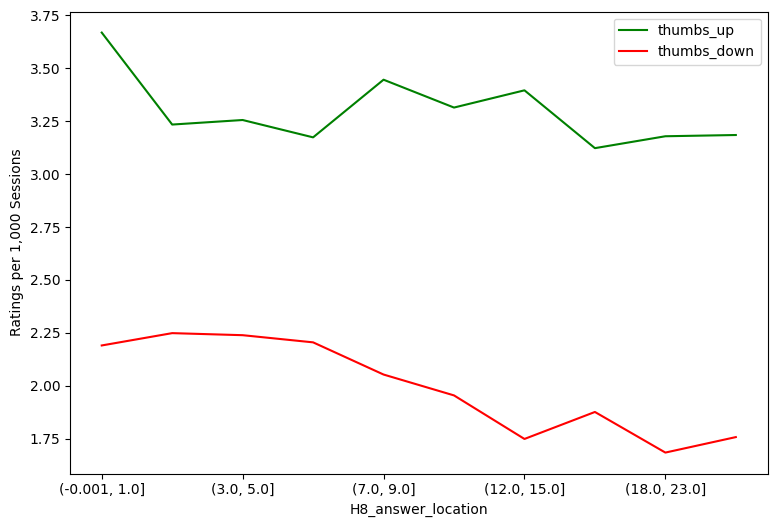

In [18]:
ratings_per_1000_sessions_continuous( sessions, 'H8_answer_location' )

## Explanatory models

Note: Mixed effects regression models that are typically used to address lack of independence in observations in the data set (here, multiple observations per question and per student) are generally much more computationally expensive to fit than ordinary fixed effects models. The data set in this work was too large to run mixed effects regression with random intercepts for both questions and students. It was therefore investigated whether this was essential to obtaining accurate modeling results. It was determined that a mixed effects model with random intercepts either for questions only or students only was sufficient. More details on this issue are discussed in our paper.

In [19]:
%%R
library( arrow )
library( glmmTMB )

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
The repository you retrieved Arrow from did not include all of Arrow's features.
You can install a fully-featured version by running:
`install.packages('arrow', repos = 'https://apache.r-universe.dev')`.

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp



In [20]:
%%R
sessions <- read_parquet( 'sessions.parquet' )
str( sessions )

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	5214211 obs. of  15 variables:
 $ student_id               : chr  "26EFUDCGXGK2R2BMUA65" "AK53WK5B75TBJXS7MMSM" "VGEWC8NNTPF6ZNP2XGDM" "35QFXU45PTMQP8PXPZH8" ...
 $ question_id              : chr  "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "0000078ca057d9d241313d8e375c22d2f051f9cb344aa8aeea685d936d138887" ...
 $ thumbs_up                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thumbs_down              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H1_first_correct         : int  0 0 0 0 1 1 1 0 0 1 ...
 $ H2_cumulative_answered   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ H3_spelling_suggestion   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H4_sentence_textrank_rank: num  0.227 0.227 0.227 0.402 0.402 ...
 $ H5_answer_tf_idf_rank    : num  0.0115 0.0115 0.0115 0.1026 0.1026 ...
 $ H6_answer_pos            : chr  "NOUN" "NOUN" "N

### Table 4a: Thumbs down regression model with random intercept per question.

In [21]:
%%R
model.thumbs_down.q_intcp <- glmmTMB( thumbs_down ~ H1_first_correct
                                                  + H2_cumulative_answered
                                                  + H3_spelling_suggestion
                                                  + H4_sentence_textrank_rank
                                                  + H5_answer_tf_idf_rank
                                                  + H6_answer_pos
                                                  + H7_answer_log_probability
                                                  + H8_answer_location
                                                  + H9_feedback
                                                  + H10_reviewed
                                                  + (1|question_id),
                                                  family=binomial(link=logit), data=sessions )
summary( model.thumbs_down.q_intcp )

 Family: binomial  ( logit )
Formula:          
thumbs_down ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | question_id)
Data: sessions

      AIC       BIC    logLik  deviance  df.resid 
 123126.5  123342.0  -61547.3  123094.5   5214195 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 66.58    8.16    
Number of obs: 5214211, groups:  question_id, 809848

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -10.754672   0.207800  -51.75  < 2e-16 ***
H1_first_correct           -0.822344   0.026247  -31.33  < 2e-16 ***
H2_cumulative_answered     -0.005909   0.000345  -17.13  < 2e-16 ***
H3_spelling_suggestion     -0.466397   0.065762   -7.09 1.32e-12 ***
H4_sentence_textrank_rank   

Odds ratios are obtained by exponentiating the model coefficients.

In [22]:
%%R
exp( cbind( OR=fixef( model.thumbs_down.q_intcp )$cond ) )

                                    OR
(Intercept)               2.134546e-05
H1_first_correct          4.394005e-01
H2_cumulative_answered    9.941080e-01
H3_spelling_suggestion    6.272580e-01
H4_sentence_textrank_rank 2.376787e+00
H5_answer_tf_idf_rank     1.635553e+00
H6_answer_posADV          2.436488e+00
H6_answer_posNOUN         1.161760e+00
H6_answer_posPROPN        1.623071e+00
H6_answer_posVERB         1.889934e+00
H7_answer_log_probability 1.069001e+00
H8_answer_location        9.897070e-01
H9_feedbackcontext        1.306807e+00
H9_feedbackoutcome        1.176990e+00
H10_reviewed              8.533507e-01


### Table 4b: Thumbs down regression model with random intercept per student.

In [23]:
%%R
model.thumbs_down.s_intcp <- glmmTMB( thumbs_down ~ H1_first_correct
                                                  + H2_cumulative_answered
                                                  + H3_spelling_suggestion
                                                  + H4_sentence_textrank_rank
                                                  + H5_answer_tf_idf_rank
                                                  + H6_answer_pos
                                                  + H7_answer_log_probability
                                                  + H8_answer_location
                                                  + H9_feedback
                                                  + H10_reviewed
                                                  + (1|student_id),
                                                  family=binomial(link=logit), data=sessions )
summary( model.thumbs_down.s_intcp )

 Family: binomial  ( logit )
Formula:          
thumbs_down ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | student_id)
Data: sessions

      AIC       BIC    logLik  deviance  df.resid 
 101357.5  101572.9  -50662.7  101325.5   5214195 

Random effects:

Conditional model:
 Groups     Name        Variance Std.Dev.
 student_id (Intercept) 93.14    9.651   
Number of obs: 5214211, groups:  student_id, 432930

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.128e+01  1.062e-01 -106.20  < 2e-16 ***
H1_first_correct          -1.224e+00  2.692e-02  -45.47  < 2e-16 ***
H2_cumulative_answered    -2.305e-03  3.583e-04   -6.43 1.24e-10 ***
H3_spelling_suggestion    -3.139e-01  6.606e-02   -4.75 2.02e-06 ***
H4_sentence_textrank_rank  1.189

In [24]:
%%R
exp( cbind( OR=fixef( model.thumbs_down.s_intcp )$cond ) )

                                    OR
(Intercept)               1.261084e-05
H1_first_correct          2.940352e-01
H2_cumulative_answered    9.976972e-01
H3_spelling_suggestion    7.306041e-01
H4_sentence_textrank_rank 3.282727e+00
H5_answer_tf_idf_rank     2.043831e+00
H6_answer_posADV          3.091070e+00
H6_answer_posNOUN         1.232843e+00
H6_answer_posPROPN        2.116725e+00
H6_answer_posVERB         2.251909e+00
H7_answer_log_probability 1.115428e+00
H8_answer_location        9.859525e-01
H9_feedbackcontext        1.203511e+00
H9_feedbackoutcome        1.314225e+00
H10_reviewed              9.498443e-01


### Table 5a: Thumbs up regression model with random intercept per question.

In [25]:
%%R
model.thumbs_up.q_intcp <- glmmTMB( thumbs_up ~ H1_first_correct
                                              + H2_cumulative_answered
                                              + H3_spelling_suggestion
                                              + H4_sentence_textrank_rank
                                              + H5_answer_tf_idf_rank
                                              + H6_answer_pos
                                              + H7_answer_log_probability
                                              + H8_answer_location
                                              + H9_feedback
                                              + H10_reviewed
                                              + (1|question_id),
                                              family=binomial(link=logit), data=sessions )
summary( model.thumbs_up.q_intcp )

 Family: binomial  ( logit )
Formula:          
thumbs_up ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | question_id)
Data: sessions

      AIC       BIC    logLik  deviance  df.resid 
 210442.6  210658.0 -105205.3  210410.6   5214195 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 46.5     6.819   
Number of obs: 5214211, groups:  question_id, 809848

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.117e+01  1.469e-01  -76.05  < 2e-16 ***
H1_first_correct           2.747e-01  1.865e-02   14.73  < 2e-16 ***
H2_cumulative_answered    -4.120e-04  1.523e-04   -2.71  0.00682 ** 
H3_spelling_suggestion     4.730e-02  3.719e-02    1.27  0.20347    
H4_sentence_textrank_rank  4.3

In [26]:
%%R
exp( cbind( OR=fixef( model.thumbs_up.q_intcp )$cond ) )

                                    OR
(Intercept)               1.408699e-05
H1_first_correct          1.316082e+00
H2_cumulative_answered    9.995881e-01
H3_spelling_suggestion    1.048439e+00
H4_sentence_textrank_rank 1.044841e+00
H5_answer_tf_idf_rank     8.718668e-01
H6_answer_posADV          7.944863e-01
H6_answer_posNOUN         9.789502e-01
H6_answer_posPROPN        8.590133e-01
H6_answer_posVERB         8.532239e-01
H7_answer_log_probability 9.677473e-01
H8_answer_location        9.973508e-01
H9_feedbackcontext        1.124672e+00
H9_feedbackoutcome        1.013060e+00
H10_reviewed              8.605770e-01


### Table 5b: Thumbs up regression model with random intercept per student.

In [27]:
%%R
model.thumbs_up.s_intcp <- glmmTMB( thumbs_up ~ H1_first_correct
                                              + H2_cumulative_answered
                                              + H3_spelling_suggestion
                                              + H4_sentence_textrank_rank
                                              + H5_answer_tf_idf_rank
                                              + H6_answer_pos
                                              + H7_answer_log_probability
                                              + H8_answer_location
                                              + H9_feedback
                                              + H10_reviewed
                                              + (1|student_id),
                                              family=binomial(link=logit), data=sessions )
summary( model.thumbs_up.s_intcp )

 Family: binomial  ( logit )
Formula:          
thumbs_up ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | student_id)
Data: sessions

      AIC       BIC    logLik  deviance  df.resid 
 139416.3  139631.8  -69692.2  139384.3   5214195 

Random effects:

Conditional model:
 Groups     Name        Variance Std.Dev.
 student_id (Intercept) 91.54    9.568   
Number of obs: 5214211, groups:  student_id, 432930

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -12.759371   0.087332 -146.10  < 2e-16 ***
H1_first_correct            0.350228   0.021698   16.14  < 2e-16 ***
H2_cumulative_answered     -0.001697   0.000255   -6.65 2.86e-11 ***
H3_spelling_suggestion      0.007810   0.041108    0.19 0.849318    
H4_sentence_textrank_rank   0.1775

In [28]:
%%R
exp( cbind( OR=fixef( model.thumbs_up.s_intcp )$cond ) )

                                    OR
(Intercept)               2.875250e-06
H1_first_correct          1.419391e+00
H2_cumulative_answered    9.983046e-01
H3_spelling_suggestion    1.007841e+00
H4_sentence_textrank_rank 1.194343e+00
H5_answer_tf_idf_rank     8.829023e-01
H6_answer_posADV          8.816940e-01
H6_answer_posNOUN         9.709034e-01
H6_answer_posPROPN        8.437571e-01
H6_answer_posVERB         8.424778e-01
H7_answer_log_probability 9.715174e-01
H8_answer_location        9.966644e-01
H9_feedbackcontext        1.032064e+00
H9_feedbackoutcome        1.042185e+00
H10_reviewed              9.443240e-01


### Table 6: Bayesian information criterion decreases for single-variable thumbs down models.

In [29]:
%%R
model <- glm( thumbs_down ~ 1,
              family=binomial(link=logit), data=sessions )
bic_intercept <- BIC( model )
bic_intercept

[1] 150537.9


In [30]:
%%R
model <- glm( thumbs_down ~ H1_first_correct,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -2190.152


In [31]:
%%R
model <- glm( thumbs_down ~ H2_cumulative_answered,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -1187.513


In [32]:
%%R
model <- glm( thumbs_down ~ H3_spelling_suggestion,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -125.0295


In [33]:
%%R
model <- glm( thumbs_down ~ H4_sentence_textrank_rank,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -480.3125


In [34]:
%%R
model <- glm( thumbs_down ~ H5_answer_tf_idf_rank,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -512.15


In [35]:
%%R
model <- glm( thumbs_down ~ H6_answer_pos,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -351.3891


In [36]:
%%R
model <- glm( thumbs_down ~ H7_answer_log_probability,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -100.0393


In [37]:
%%R
model <- glm( thumbs_down ~ H8_answer_location,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -74.98732


In [38]:
%%R
model <- glm( thumbs_down ~ H9_feedback,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -414.7528


In [39]:
%%R
model <- glm( thumbs_down ~ H10_reviewed,
              family=binomial(link=logit), data=sessions )
BIC( model ) - bic_intercept

[1] -20.58677


## Analysis by Subject

Filter data set to subjects having at least 50 thumbs down ratings as described in the paper.

In [40]:
top_subjects = sessions.groupby( 'subject' ).thumbs_down.sum().sort_values( ascending=False )
top_subjects = top_subjects[ top_subjects >= 50 ].index
top_subjects_sessions = sessions[ sessions.subject.isin( top_subjects ) ]
top_subjects_sessions.to_parquet( 'top_subjects_sessions.parquet', index=False )

### Table 7: The data set organized by the 17 selected subjects.

In [41]:
top_subjects_stats = pd.DataFrame( sessions.subject.value_counts( normalize=True, dropna=False ).round( 3 ) * 100 )
top_subjects_stats = top_subjects_stats[ top_subjects_stats.index.isin( top_subjects ) ]
top_subjects_stats = top_subjects_stats.rename( { 'proportion': 'percentage' }, axis=1 )
gb = top_subjects_sessions.groupby( 'subject' )
top_subjects_stats[ 'sessions' ] = gb.question_id.count()
top_subjects_stats[ 'questions' ] = gb.question_id.nunique()
top_subjects_stats[ 'students' ] = gb.student_id.nunique()
top_subjects_stats[ 'thumbs_up' ] = gb.thumbs_up.sum()
top_subjects_stats[ 'thumbs_down' ] = gb.thumbs_down.sum()
top_subjects_stats

,percentage,sessions,questions,students,thumbs_up,thumbs_down
subject,,,,,,
Medical,15.9,826582,131904,81993,3475,1556
Business & Economics,15.2,794750,130246,70747,2358,1616
Psychology,13.8,717593,87001,49774,2046,1688
Education,10.0,519659,80466,44838,1411,1041
Social Science,9.2,479094,90403,45336,1323,953
Political Science,5.2,272626,39771,20318,562,390
Computers,3.9,205890,28758,18261,651,693
Science,3.8,198452,32694,27432,652,436
Language Arts & Disciplines,3.8,195598,22489,14103,364,287


### Figure 5: Ratings per 1,000 sessions for subjects in order of most to fewest total sessions.
Dashed lines indicate the overall mean thumbs up and thumbs down rates for comparison.

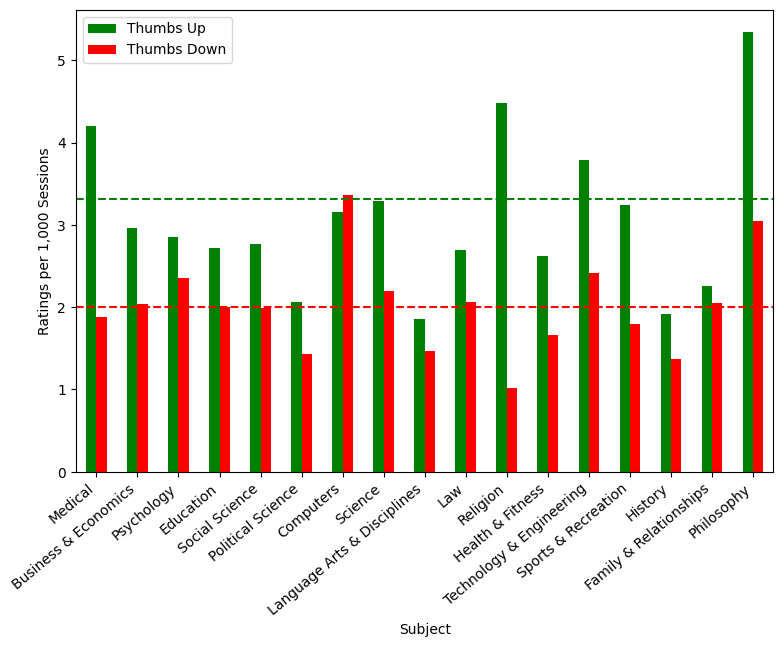

In [42]:
top_subjects_rates = top_subjects_sessions.groupby( 'subject' ).agg(
    thumbs_up=( 'thumbs_up', lambda g: g.mean() * 1000 ),
    thumbs_down=( 'thumbs_down', lambda g: g.mean() * 1000 ),
).rename( { 'thumbs_up': 'Thumbs Up', 'thumbs_down': 'Thumbs Down' }, axis=1 )
top_subjects_rates.loc[ top_subjects_stats.index ].plot.bar( figsize=( 9, 6 ), color='g r'.split() )
plt.xticks( rotation=40, ha='right' )
plt.ylabel( 'Ratings per 1,000 Sessions' )
plt.xlabel( 'Subject' )
plt.axhline( sessions.thumbs_up.mean() * 1000, ls='--', c='g' )
plt.axhline( sessions.thumbs_down.mean() * 1000, ls='--', c='r' );

### Table 8: Subjects with differences in significance from the Science baseline.

Science was used as the baseline for adding the subject categorical variable to the model. As discussed in the paper, this was done because the thumbs up and thumbs down rates for Science are similar to those of the entire data set.

In [43]:
%%R
top_subjects_sessions <- read_parquet( 'top_subjects_sessions.parquet' )
top_subjects_sessions$subject <- relevel( factor( top_subjects_sessions$subject ), ref='Science' )
str( top_subjects_sessions )

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4714395 obs. of  15 variables:
 $ student_id               : chr  "26EFUDCGXGK2R2BMUA65" "AK53WK5B75TBJXS7MMSM" "VGEWC8NNTPF6ZNP2XGDM" "35QFXU45PTMQP8PXPZH8" ...
 $ question_id              : chr  "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "0000078ca057d9d241313d8e375c22d2f051f9cb344aa8aeea685d936d138887" ...
 $ thumbs_up                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thumbs_down              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H1_first_correct         : int  0 0 0 0 1 1 1 0 0 1 ...
 $ H2_cumulative_answered   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ H3_spelling_suggestion   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H4_sentence_textrank_rank: num  0.227 0.227 0.227 0.402 0.402 ...
 $ H5_answer_tf_idf_rank    : num  0.0115 0.0115 0.0115 0.1026 0.1026 ...
 $ H6_answer_pos            : chr  "NOUN" "NOUN" "N

In [44]:
%%R
model <- glmmTMB( thumbs_down ~ H1_first_correct
                              + H2_cumulative_answered
                              + H3_spelling_suggestion
                              + H4_sentence_textrank_rank
                              + H5_answer_tf_idf_rank
                              + H6_answer_pos
                              + H7_answer_log_probability
                              + H8_answer_location
                              + H9_feedback
                              + H10_reviewed
                              + subject
                              + (1|question_id),
                              family=binomial(link=logit), data=top_subjects_sessions )
summary( model )

 Family: binomial  ( logit )
Formula:          
thumbs_down ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + subject + (1 | question_id)
Data: top_subjects_sessions

      AIC       BIC    logLik  deviance  df.resid 
 112785.0  113212.7  -56360.5  112721.0   4714363 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 66.39    8.148   
Number of obs: 4714395, groups:  question_id, 738935

Conditional model:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -1.067e+01  2.621e-01  -40.70  < 2e-16 ***
H1_first_correct                   -8.015e-01  2.737e-02  -29.29  < 2e-16 ***
H2_cumulative_answered             -5.828e-03  3.617e-04  -16.11  < 2e-16 ***
H3_spelling_suggestion             -4.

In [45]:
%%R
model <- glmmTMB( thumbs_up ~ H1_first_correct
                            + H2_cumulative_answered
                            + H3_spelling_suggestion
                            + H4_sentence_textrank_rank
                            + H5_answer_tf_idf_rank
                            + H6_answer_pos
                            + H7_answer_log_probability
                            + H8_answer_location
                            + H9_feedback
                            + H10_reviewed
                            + subject
                            + (1|question_id),
                            family=binomial(link=logit), data=top_subjects_sessions )
summary( model )

 Family: binomial  ( logit )
Formula:          
thumbs_up ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + subject + (1 | question_id)
Data: top_subjects_sessions

      AIC       BIC    logLik  deviance  df.resid 
 176070.8  176498.5  -88003.4  176006.8   4714363 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 49.91    7.065   
Number of obs: 4714395, groups:  question_id, 738935

Conditional model:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -1.116e+01  1.975e-01  -56.52  < 2e-16 ***
H1_first_correct                    3.091e-01  2.061e-02   15.00  < 2e-16 ***
H2_cumulative_answered             -1.120e-03  2.025e-04   -5.53 3.21e-08 ***
H3_spelling_suggestion              1.00

## Future Research: Tuning the AQG System

### Table 9: Estimated ratings changes for thresholded quantitative variables.

In [46]:
thumbs_down_rate, thumbs_up_rate = sessions[ 'thumbs_down thumbs_up'.split() ].mean() * 1000

In [47]:
percentile = 0.8

In [48]:
rows = []

In [49]:
variable = 'H4_sentence_textrank_rank'
threshold = sessions[ variable ].quantile( percentile )
thresholded_thumbs_down_rate, thresholded_thumbs_up_rate = ( sessions[ sessions[ variable ] < threshold ][ 'thumbs_down thumbs_up'.split() ].mean() * 1000 )
rows.append( [
    variable,
    threshold.round( 3 ),
    *np.array( [
        thresholded_thumbs_down_rate,
        thresholded_thumbs_down_rate - thumbs_down_rate,
        thresholded_thumbs_up_rate,
        thresholded_thumbs_up_rate - thumbs_up_rate    
    ] ).round( 2 ).tolist()
] )

In [50]:
variable = 'H5_answer_tf_idf_rank'
threshold = sessions[ variable ].quantile( percentile )
thresholded_thumbs_down_rate, thresholded_thumbs_up_rate = ( sessions[ sessions[ variable ] < threshold ][ 'thumbs_down thumbs_up'.split() ].mean() * 1000 )
rows.append( [
    variable,
    threshold.round( 3 ),
    *np.array( [
        thresholded_thumbs_down_rate,
        thresholded_thumbs_down_rate - thumbs_down_rate,
        thresholded_thumbs_up_rate,
        thresholded_thumbs_up_rate - thumbs_up_rate    
    ] ).round( 2 ).tolist()
] )

In [51]:
variable = 'H7_answer_log_probability'
threshold = sessions[ variable ].quantile( percentile )
thresholded_thumbs_down_rate, thresholded_thumbs_up_rate = ( sessions[ sessions[ variable ] < threshold ][ 'thumbs_down thumbs_up'.split() ].mean() * 1000 )
rows.append( [
    variable,
    threshold.round( 1 ),
    *np.array( [
        thresholded_thumbs_down_rate,
        thresholded_thumbs_down_rate - thumbs_down_rate,
        thresholded_thumbs_up_rate,
        thresholded_thumbs_up_rate - thumbs_up_rate    
    ] ).round( 2 ).tolist()
] )

In [52]:
variable = 'H8_answer_location'
threshold = sessions[ variable ].quantile( 1 - percentile )
thresholded_thumbs_down_rate, thresholded_thumbs_up_rate = ( sessions[ sessions[ variable ] > threshold ][ 'thumbs_down thumbs_up'.split() ].mean() * 1000 )
rows.append( [
    variable,
    str( int( threshold ) ),
    *np.array( [
        thresholded_thumbs_down_rate,
        thresholded_thumbs_down_rate - thumbs_down_rate,
        thresholded_thumbs_up_rate,
        thresholded_thumbs_up_rate - thumbs_up_rate    
    ] ).round( 2 ).tolist()
] )

In [53]:
pd.DataFrame( rows, columns=[ 'Variable', 'Threshold', 'Thumbs Down', 'Δ Thumbs Down', 'Thumbs Up', 'Δ Thumbs Up' ] ).set_index( 'Variable' )

,Threshold,Thumbs Down,Δ Thumbs Down,Thumbs Up,Δ Thumbs Up
Variable,,,,,
H4_sentence_textrank_rank,0.444,1.82,-0.18,3.34,0.03
H5_answer_tf_idf_rank,0.201,1.76,-0.24,3.34,0.03
H7_answer_log_probability,-10.9,1.96,-0.04,3.38,0.06
H8_answer_location,3,1.94,-0.06,3.26,-0.05
